In [107]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [108]:
df = pd.read_csv('df_regression.csv')

In [109]:
df.head()

,Unnamed: 0,created_date,gross_rent,income,pop,Borough,zip,fall,spring,summer,winter,bronx,brooklyn,manhattan,queens,staten_island,count_zip_code
0,0,Winter,645,24610,12468,BROOKLYN,411,0,0,0,1,0,1,0,0,0,411
1,1,Winter,705,21553,38938,BRONX,2272,0,0,0,1,1,0,0,0,0,2272
2,2,Winter,744,31371,43444,BROOKLYN,1895,0,0,0,1,0,1,0,0,0,1895
3,3,Winter,758,26893,34187,MANHATTAN,2385,0,0,0,1,0,0,1,0,0,2385
4,4,Winter,851,23962,42779,BRONX,2887,0,0,0,1,1,0,0,0,0,2887


In [110]:
df = df.drop(['Unnamed: 0'], axis=1)

In [111]:
df.head()

,created_date,gross_rent,income,pop,Borough,zip,fall,spring,summer,winter,bronx,brooklyn,manhattan,queens,staten_island,count_zip_code
0,Winter,645,24610,12468,BROOKLYN,411,0,0,0,1,0,1,0,0,0,411
1,Winter,705,21553,38938,BRONX,2272,0,0,0,1,1,0,0,0,0,2272
2,Winter,744,31371,43444,BROOKLYN,1895,0,0,0,1,0,1,0,0,0,1895
3,Winter,758,26893,34187,MANHATTAN,2385,0,0,0,1,0,0,1,0,0,2385
4,Winter,851,23962,42779,BRONX,2887,0,0,0,1,1,0,0,0,0,2887


In [112]:
data_pred = df.copy()
data_pred = data_pred.drop(columns=['created_date', 'zip', 'Borough'])
data_pred.head()

,gross_rent,income,pop,fall,spring,summer,winter,bronx,brooklyn,manhattan,queens,staten_island,count_zip_code
0,645,24610,12468,0,0,0,1,0,1,0,0,0,411
1,705,21553,38938,0,0,0,1,1,0,0,0,0,2272
2,744,31371,43444,0,0,0,1,0,1,0,0,0,1895
3,758,26893,34187,0,0,0,1,0,0,1,0,0,2385
4,851,23962,42779,0,0,0,1,1,0,0,0,0,2887


In [113]:
data_pred.shape

(755, 13)

In [114]:
data_pred.corr()

,gross_rent,income,pop,fall,spring,summer,winter,bronx,brooklyn,manhattan,queens,staten_island,count_zip_code
gross_rent,1.000000,0.869473,-0.438015,0.002624,-0.001114,-0.002245,0.000738,-0.279082,-0.175563,0.524909,-0.042454,-0.153342,-0.393206
income,0.869473,1.000000,-0.488446,0.002519,-0.001187,-0.002219,0.000890,-0.270258,-0.199882,0.452973,-0.058274,0.032610,-0.485080
pop,-0.438015,-0.488446,1.000000,0.002910,0.001546,0.001442,-0.005909,0.116260,0.406091,-0.228616,-0.187176,-0.081312,0.729236
fall,0.002624,0.002519,0.002910,1.000000,-0.332744,-0.335101,-0.332744,-0.000306,-0.004123,0.004896,-0.000547,-0.000199,-0.021451
spring,-0.001114,-0.001187,0.001546,-0.332744,1.000000,-0.333918,-0.331570,0.000918,-0.002530,-0.000472,0.001645,0.000599,-0.023048
summer,-0.002245,-0.002219,0.001442,-0.335101,-0.333918,1.000000,-0.333918,-0.001525,0.001723,-0.003948,0.003715,-0.000994,-0.029021
winter,0.000738,0.000890,-0.005909,-0.332744,-0.331570,-0.333918,1.000000,0.000918,0.004931,-0.000472,-0.004825,0.000599,0.073661
bronx,-0.279082,-0.270258,0.116260,-0.000306,0.000918,-0.001525,0.000918,1.000000,-0.208909,-0.227706,-0.286283,-0.104145,0.264151
brooklyn,-0.175563,-0.199882,0.406091,-0.004123,-0.002530,0.001723,0.004931,-0.208909,1.000000,-0.297768,-0.374369,-0.136189,0.334014
manhattan,0.524909,0.452973,-0.228616,0.004896,-0.000472,-0.003948,-0.000472,-0.227706,-0.297768,1.000000,-0.408054,-0.148443,-0.122133


In [115]:
abs(data_pred.corr()) > .75

,gross_rent,income,pop,fall,spring,summer,winter,bronx,brooklyn,manhattan,queens,staten_island,count_zip_code
gross_rent,True,True,False,False,False,False,False,False,False,False,False,False,False
income,True,True,False,False,False,False,False,False,False,False,False,False,False
pop,False,False,True,False,False,False,False,False,False,False,False,False,False
fall,False,False,False,True,False,False,False,False,False,False,False,False,False
spring,False,False,False,False,True,False,False,False,False,False,False,False,False
summer,False,False,False,False,False,True,False,False,False,False,False,False,False
winter,False,False,False,False,False,False,True,False,False,False,False,False,False
bronx,False,False,False,False,False,False,False,True,False,False,False,False,False
brooklyn,False,False,False,False,False,False,False,False,True,False,False,False,False
manhattan,False,False,False,False,False,False,False,False,False,True,False,False,False


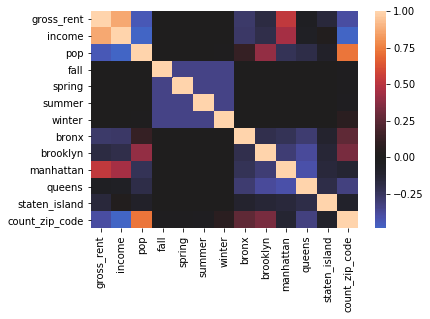

In [116]:
sns.heatmap(data_pred.corr(), center = 0)

In [117]:
data_ols = data_pred.copy()

In [118]:
outcome = 'count_zip_code'
predictors = data_ols.drop('count_zip_code', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum + " -1" 
model = ols(formula= formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         count_zip_code   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     123.1
Date:                Thu, 06 Dec 2018   Prob (F-statistic):          2.48e-150
Time:                        17:28:09   Log-Likelihood:                -6365.8
No. Observations:                 755   AIC:                         1.275e+04
Df Residuals:                     744   BIC:                         1.280e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
gross_rent        0.4949      0.183      2.704      0.007       0.136       0.854
income           -0.0163      0.003     -6.223      0.000      -0.021      -0.011
pop               0.0394      0.002     21.162      0.000       0.036       0.043
fall            496.8733    135.347      3.671      0.000     231.166     762.581
spring          493.5310    135.253      3.649      0.000     228.008     759.054
summer          477.0825    134.986      3.534      0.000     212.084     742.081
winter          808.3937    134.888      5.993      0.000     543.587    1073.201
bronx          1039.6967    127.297      8.167      0.000     789.793    1289.601
brooklyn        551.9690    139.600      3.954      0.000     277.912     826.026
manhattan       613.1853    154.222      3.976      0.000     310.423     915.947
queens         -211.0494    110.126     -1.916      0.056    -427.245       5.146
staten_island   282.0788    159.535      1.768      0.077     -31.113     595.271
==============================================================================
Omnibus:                      103.560   Durbin-Watson:                   2.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.910
Skew:                          -0.443   Prob(JB):                    9.86e-133
Kurtosis:                       7.306   Cond. No.                     1.02e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.49e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [119]:
data = df

In [120]:
data.head()

,created_date,gross_rent,income,pop,Borough,zip,fall,spring,summer,winter,bronx,brooklyn,manhattan,queens,staten_island,count_zip_code
0,Winter,645,24610,12468,BROOKLYN,411,0,0,0,1,0,1,0,0,0,411
1,Winter,705,21553,38938,BRONX,2272,0,0,0,1,1,0,0,0,0,2272
2,Winter,744,31371,43444,BROOKLYN,1895,0,0,0,1,0,1,0,0,0,1895
3,Winter,758,26893,34187,MANHATTAN,2385,0,0,0,1,0,0,1,0,0,2385
4,Winter,851,23962,42779,BRONX,2887,0,0,0,1,1,0,0,0,0,2887


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c27f0b2e8>,
      dtype=object)

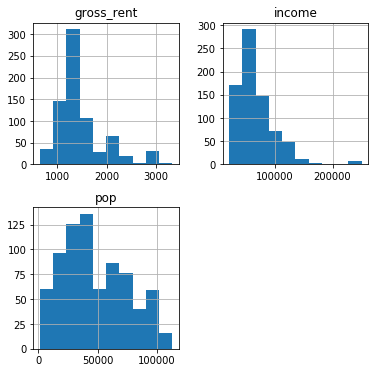

In [121]:
data[['created_date', 'gross_rent', 'income', 'pop', ]].hist(figsize  = [6, 6])





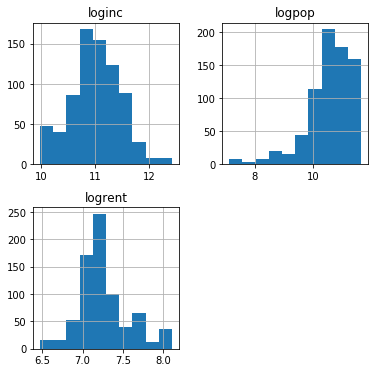

In [122]:
data_log = pd.DataFrame([])
data_log['logrent'] = np.log(data['gross_rent'])
data_log['loginc'] = np.log(data['income'])
data_log['logpop'] = np.log(data['pop'])
data_log.hist(figsize  = [6, 6]);

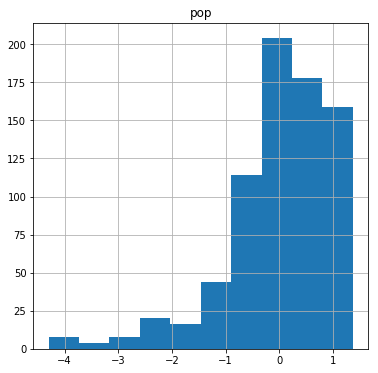

In [123]:
logpop = data_log['logpop']

scaled_pop = (logpop-np.mean(logpop))/np.sqrt(np.var(logpop))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled['pop']= scaled_pop

data_cont_scaled.hist(figsize  = [6, 6]);

In [124]:
log_data_ols = data_pred.copy()

In [125]:
log_data_ols['log_gross_rent']=np.log(log_data_ols['gross_rent'])
log_data_ols['log_income']=np.log(log_data_ols['income'])

In [126]:
log_data_ols.head()

,gross_rent,income,pop,fall,spring,summer,winter,bronx,brooklyn,manhattan,queens,staten_island,count_zip_code,log_gross_rent,log_income
0,645,24610,12468,0,0,0,1,0,1,0,0,0,411,6.469250,10.110908
1,705,21553,38938,0,0,0,1,1,0,0,0,0,2272,6.558198,9.978270
2,744,31371,43444,0,0,0,1,0,1,0,0,0,1895,6.612041,10.353639
3,758,26893,34187,0,0,0,1,0,0,1,0,0,2385,6.630683,10.199621
4,851,23962,42779,0,0,0,1,1,0,0,0,0,2887,6.746412,10.084225


In [127]:
outcome = 'count_zip_code'
predictors = log_data_ols.drop(['count_zip_code', ], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum + " -1" 
model = ols(formula= formula, data=log_data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         count_zip_code   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     114.4
Date:                Thu, 06 Dec 2018   Prob (F-statistic):          1.15e-159
Time:                        17:28:10   Log-Likelihood:                -6338.8
No. Observations:                 755   AIC:                         1.270e+04
Df Residuals:                     742   BIC:                         1.276e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gross_rent        -3.3863      0.625     -5.416      0.000      -4.614      -2.159
income             0.0175      0.005      3.247      0.001       0.007       0.028
pop                0.0342      0.002     17.530      0.000       0.030       0.038
fall           -6274.6127   2467.325     -2.543      0.011   -1.11e+04   -1430.843
spring         -6278.2411   2467.177     -2.545      0.011   -1.11e+04   -1434.763
summer         -6294.6898   2467.349     -2.551      0.011   -1.11e+04   -1450.874
winter         -5964.4035   2467.685     -2.417      0.016   -1.08e+04   -1119.928
bronx          -4679.5067   1963.898     -2.383      0.017   -8534.964    -824.049
brooklyn       -4863.3260   1975.920     -2.461      0.014   -8742.386    -984.266
manhattan      -4760.3279   1956.758     -2.433      0.015   -8601.769    -918.887
queens         -5706.9016   2002.111     -2.850      0.004   -9637.379   -1776.425
staten_island  -4801.8848   1981.234     -2.424      0.016   -8691.376    -912.393
log_gross_rent  6958.0507   1044.203      6.664      0.000    4908.107    9007.994
log_income     -3133.9452    439.928     -7.124      0.000   -3997.596   -2270.294
==============================================================================
Omnibus:                      120.486   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              680.102
Skew:                          -0.576   Prob(JB):                    2.08e-148
Kurtosis:                       7.505   Cond. No.                     9.76e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.98e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

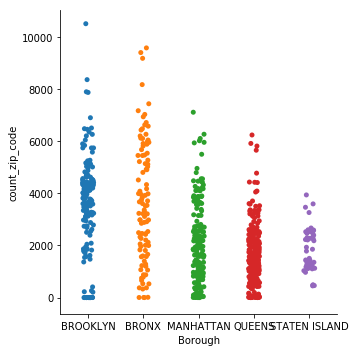

In [128]:
borough_plot = df.drop(['created_date', 'gross_rent', 'income', 'pop', 'zip', 'bronx', 'brooklyn', 'manhattan', 'queens', 'staten_island', 'winter', 'spring', 'summer', 'fall'], axis=1)
sns.catplot(x='Borough', y='count_zip_code', data=borough_plot);


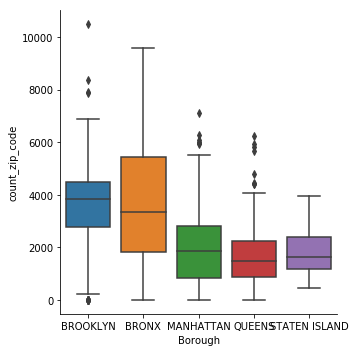

In [129]:
sns.catplot(x='Borough', y='count_zip_code', kind="box", data=borough_plot);

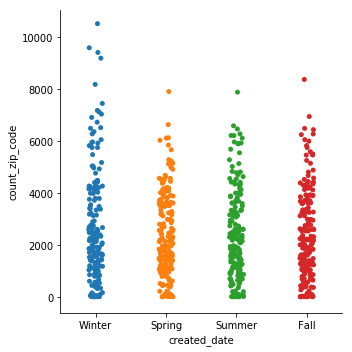

In [130]:
season_plot = df.drop(['Borough', 'gross_rent', 'income', 'pop', 'zip', 'bronx', 'brooklyn', 'manhattan', 'queens', 'staten_island', 'winter', 'spring', 'summer', 'fall'], axis=1)
sns.catplot(x='created_date', y='count_zip_code', data=season_plot);

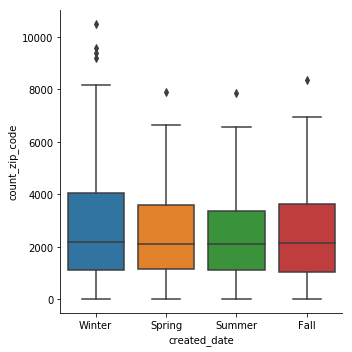

In [131]:
sns.catplot(x='created_date', y='count_zip_code', kind="box", data=season_plot);

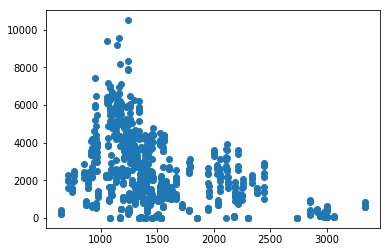

In [132]:
plt.scatter(df['gross_rent'], df['count_zip_code'])

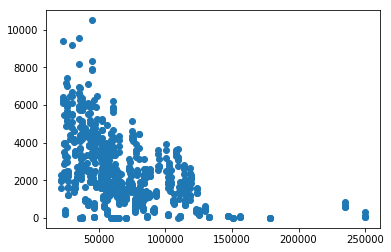

In [133]:
plt.scatter(df['income'], df['count_zip_code'])

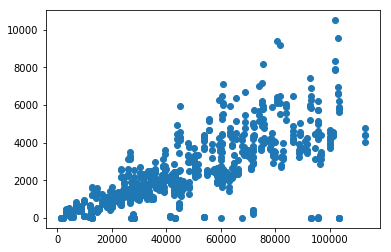

In [134]:
plt.scatter(df['pop'], df['count_zip_code'])

In [135]:
log_data_ols.head()

,gross_rent,income,pop,fall,spring,summer,winter,bronx,brooklyn,manhattan,queens,staten_island,count_zip_code,log_gross_rent,log_income
0,645,24610,12468,0,0,0,1,0,1,0,0,0,411,6.469250,10.110908
1,705,21553,38938,0,0,0,1,1,0,0,0,0,2272,6.558198,9.978270
2,744,31371,43444,0,0,0,1,0,1,0,0,0,1895,6.612041,10.353639
3,758,26893,34187,0,0,0,1,0,0,1,0,0,2385,6.630683,10.199621
4,851,23962,42779,0,0,0,1,1,0,0,0,0,2887,6.746412,10.084225


In [136]:
y = log_data_ols.count_zip_code
X = log_data_ols.drop(['count_zip_code'], axis=1)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [102]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

604 151 604 151


In [103]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [104]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [105]:
rmse_train = np.sqrt(np.sum((y_train-y_hat_train)**2))/len(y_train)
rmse_test = np.sqrt(np.sum((y_test-y_hat_test)**2))/len(y_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 43.93823482136554
Test Root Mean Squarred Error: 85.02813496830704


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


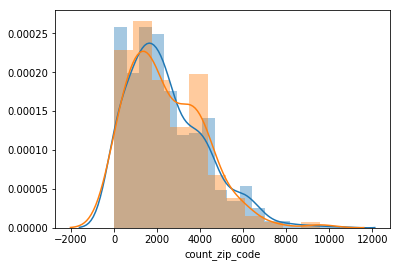

In [106]:
sns.distplot(y_train)
sns.distplot(y_test)